In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Table 1


| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Method    | where features come from; raw data, pca, un- / pre- / re-trained CNN |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [3]:
# load data
df_table1                     = pd.read_pickle('table1_data')
# aggregate iterations in mean and std
df_table1_iterAggregated_mean = df_table1.groupby(['set', 'method', 'class'], as_index=False).mean()
df_table1_iterAggregated_std  = df_table1.groupby(['set', 'method', 'class'], as_index=False).std()
# pivot to table shape
df_table1_mean_reshaped       = df_table1_iterAggregated_mean.pivot(index='method', columns=['set', 'class'], values='f1')
df_table1_std_reshaped        = df_table1_iterAggregated_std.pivot(index='method', columns=['set', 'class'], values='f1')
# reorder rows
df_table1_mean_final = df_table1_mean_reshaped.reindex(['raw', 'pca', 'un_trained', 'pre_trained', 'refined'])
df_table1_std_final  = df_table1_std_reshaped.reindex(['raw', 'pca', 'un_trained', 'pre_trained', 'refined'])
# display and save
display(df_table1_mean_final)
df_table1_mean_final.to_pickle('table1_mean')
display(df_table1_std_final)
df_table1_std_final.to_pickle('table1_std')


set                 1                                                    \
class             Avg        CC        CG       CST        FX     Other   
method                                                                    
raw          0.257215  0.398581  0.147830  0.348409  0.134041  0.765591   
pca          0.293318  0.418292  0.256288  0.352515  0.146178  0.793486   
un_trained   0.172697  0.149508  0.174152  0.186788  0.180340  0.392182   
pre_trained  0.314165  0.498102  0.359297  0.262687  0.136576  0.718755   
refined      0.378953  0.517930  0.383524  0.388359  0.225999  0.818645   

set                 2                                                    \
class             Avg  IFO_left IFO_right  ILF_left ILF_right     Other   
method                                                                    
raw          0.142027  0.138294  0.195077  0.190285  0.203714  0.615030   
pca          0.164220  0.176642  0.240287  0.196002  0.202524  0.661322   
un_trained   0.260150  0.303555  0.349187  0.177456  0.360825  0.141770   
pre_trained  0.377383  0.410335  0.449273  0.304735  0.442546  0.486189   
refined      0.402847  0.431601  0.476042  0.405224  0.465521  0.657067   

set                              
class        SLF_left SLF_right  
method                           
raw          0.017312  0.107481  
pca          0.037274  0.132593  
un_trained   0.027097  0.342781  
pre_trained  0.181227  0.476183  
refined      0.138660  0.500036

set                 1                                                    \
class             Avg        CC        CG       CST        FX     Other   
method                                                                    
raw          0.018787  0.058169  0.048644  0.025453  0.034791  0.026620   
pca          0.020580  0.081573  0.037147  0.029231  0.032259  0.019328   
un_trained   0.022060  0.040184  0.053132  0.029407  0.044068  0.145700   
pre_trained  0.029156  0.083297  0.065965  0.048758  0.037463  0.062467   
refined      0.033735  0.078662  0.056553  0.031739  0.075040  0.020824   

set                 2                                                    \
class             Avg  IFO_left IFO_right  ILF_left ILF_right     Other   
method                                                                    
raw          0.006518  0.022816  0.025838  0.008299  0.022213  0.020175   
pca          0.008454  0.020227  0.025749  0.009769  0.016786  0.020063   
un_trained   0.021648  0.056803  0.054542  0.032927  0.044124  0.071912   
pre_trained  0.024969  0.043170  0.058786  0.081041  0.076524  0.082330   
refined      0.032317  0.051756  0.051037  0.063622  0.061444  0.046129   

set                              
class        SLF_left SLF_right  
method                           
raw          0.010059  0.016455  
pca          0.023659  0.020791  
un_trained   0.012476  0.031592  
pre_trained  0.047646  0.048115  
refined      0.045703  0.042559

To copy paste as markdown, run cell below

In [14]:
print(df_table1_mean_final.to_markdown(tablefmt='github'))
print(df_table1_std_final.to_markdown(tablefmt='github'))

| method      |   (1, 'Avg') |   (1, 'CC') |   (1, 'CG') |   (1, 'CST') |   (1, 'FX') |   (1, 'Other') |   (2, 'Avg') |   (2, 'IFO_left') |   (2, 'IFO_right') |   (2, 'ILF_left') |   (2, 'ILF_right') |   (2, 'Other') |   (2, 'SLF_left') |   (2, 'SLF_right') |
|-------------|--------------|-------------|-------------|--------------|-------------|----------------|--------------|-------------------|--------------------|-------------------|--------------------|----------------|-------------------|--------------------|
| raw         |     0.257215 |    0.398581 |    0.14783  |     0.348409 |    0.134041 |       0.765591 |     0.142027 |          0.138294 |           0.195077 |          0.190285 |           0.203714 |       0.61503  |         0.0173119 |           0.107481 |
| pca         |     0.293318 |    0.418292 |    0.256288 |     0.352515 |    0.146178 |       0.793486 |     0.16422  |          0.176642 |           0.240287 |          0.196002 |           0.202524 |       0.661322 |  

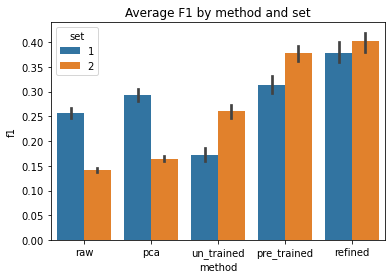

In [37]:
p = sns.barplot(data=df_table1[(df_table1['class'] == 'Avg')], x='method', y='f1', hue='set')
plt.title("Average F1 by method and set")
plt.show()
#p.get_figure().savefig('avg_f1.png', dpi=800)

_________________
# Ablation Study

| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Ablate    | which component is ablated, i.e. no regularizer used |
| T         | Iterator over annotation cycles, i.e. 'time' |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [17]:
df_ablation = pd.read_pickle('ablation_new')
df_ablation.head()

,f1,ablate,t,class,set,iter
0,0.688962,full,0,Other,1,0
1,0.349903,full,0,CG,1,0
2,0.267482,full,0,CST,1,0
3,0.146192,full,0,FX,1,0
4,0.458017,full,0,CC,1,0


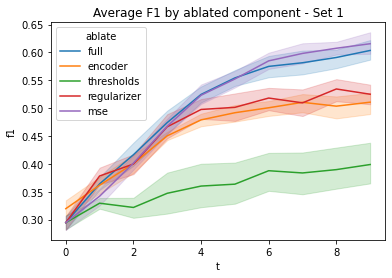

In [18]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

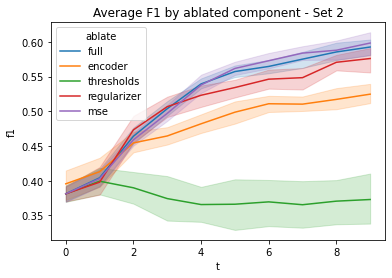

In [19]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()